In [4]:
!pip install torch

import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns


In [5]:
iris = load_iris()
x= iris.data
y= iris.target


In [6]:
#TODO: split the dataset into train and test (20% test)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)


In [7]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
# convert everything to tensor
x_train=torch.tensor(x_train, dtype=torch.float32)
x_test=torch.tensor(x_test, dtype=torch.float32)

y_train=torch.tensor(y_train, dtype=int)
y_test=torch.tensor(y_test, dtype=int)

In [9]:
#Model Class
class multiclassclassifier(nn.Module):
  def __init__(self):
    super(multiclassclassifier, self).__init__()
    self.linear1=nn.Linear(4,10) #number of input features, number of hidden layers
    self.linear2=nn.Linear(10,6) #number of hidden layers, number of hidden layers
    self.linear3=nn.Linear(6,3)#number of hidden layers, number of categories in target


  def forward(self,x):
    x1=torch.relu(self.linear1(x))
    x2=torch.relu(self.linear2(x1))
    x3=self.linear3(x2)
    return x3



In [10]:
model=multiclassclassifier()
loss=nn.CrossEntropyLoss()
criteria=torch.optim.SGD(model.parameters(), lr=0.01)
num_epochs=500




In [11]:
#training loop
for epoch in range(num_epochs):
  model.train()
  predicted_y=model(x_train)
  losses=loss(predicted_y, y_train)

  #ask the model to minimize the loss
  criteria.zero_grad()
  losses.backward()
  criteria.step()
  print(losses.item())

  #store the training loss in list
  #eveluation
  model.eval()
  with torch.no_grad():
    test_y=model(x_test)
    test_loss=loss(test_y,y_test)



1.1029105186462402
1.102052092552185
1.101196050643921
1.1003453731536865
1.099502682685852
1.0986618995666504
1.0978457927703857
1.0970344543457031
1.0962363481521606
1.0954439640045166
1.0946614742279053
1.0939009189605713
1.0931545495986938
1.092410683631897
1.0916730165481567
1.0909370183944702
1.090208888053894
1.0894958972930908
1.0887895822525024
1.0880930423736572
1.087404727935791
1.086716890335083
1.0860310792922974
1.0853487253189087
1.0846668481826782
1.0839849710464478
1.0833048820495605
1.082628607749939
1.0819556713104248
1.0812830924987793
1.0806106328964233
1.0799380540847778
1.0792655944824219
1.0785934925079346
1.0779207944869995
1.0772478580474854
1.0765739679336548
1.075899600982666
1.0752272605895996
1.0745571851730347
1.073886752128601
1.0732176303863525
1.0725518465042114
1.071885585784912
1.0712189674377441
1.0705523490905762
1.0698847770690918
1.069216012954712
1.0685455799102783
1.067874789237976
1.0672032833099365
1.0665310621261597
1.065860629081726
1.06519

In [12]:
with torch.no_grad():
  outputs=model(x_test)
  print(outputs)

tensor([[-1.7255, -0.1637,  0.7287],
        [ 1.0732, -0.2491, -0.9905],
        [ 1.1474, -0.2719, -1.0371],
        [-1.8029, -0.1808,  0.8120],
        [ 1.0015, -0.2093, -0.9542],
        [-0.7903, -0.1244,  0.1846],
        [-2.0739, -0.2027,  0.9582],
        [-0.3449, -0.0506, -0.1717],
        [-0.6476, -0.0465,  0.0508],
        [-2.0300, -0.2155,  0.9033],
        [-0.1341, -0.0293, -0.2888],
        [-3.0521, -0.4258,  1.4439],
        [ 1.0662, -0.2367, -0.9911],
        [-1.0890, -0.0915,  0.3108],
        [-2.4132, -0.2993,  1.0998],
        [-1.0649, -0.0986,  0.3240],
        [-1.0959, -0.0826,  0.3234],
        [-1.1775, -0.0875,  0.3781],
        [-0.8349, -0.1749,  0.0432],
        [ 0.9811, -0.2000, -0.9428],
        [ 0.9087, -0.1595, -0.9062],
        [-0.5825, -0.0392, -0.0143],
        [ 0.9850, -0.1944, -0.9485],
        [ 0.9580, -0.1818, -0.9337],
        [ 0.9627, -0.1894, -0.9336],
        [ 0.9174, -0.1748, -0.9054],
        [ 1.0805, -0.2536, -0.9940],
 

0.5975492596626282
0.5963767170906067
0.595207929611206
0.594042956829071
0.5928816199302673
0.5917242765426636
0.5905705094337463
0.5894205570220947
0.5882745981216431
0.5871326923370361
0.5859947204589844
0.5848606824874878
0.5837305784225464
0.5826044678688049
0.5814822316169739
0.5803643465042114
0.5792505145072937
0.5781407952308655
0.5770350098609924
0.5759336352348328
0.5748369693756104
0.5737445950508118
0.5726563334465027
0.5715713500976562
0.5704897046089172
0.569412112236023
0.5683387517929077
0.5672697424888611
0.5662058591842651
0.5651472210884094
0.5640926361083984
0.5630424618721008
0.561996340751648
0.5609545111656189
0.5599169135093689
0.5588836073875427
0.5578547120094299
0.5568308234214783
0.5558112263679504
0.5547958016395569
0.5537846684455872
0.5527777075767517
0.5517750978469849
0.5507775545120239
0.5497841238975525
0.5487950444221497
0.5478097796440125
0.5468276143074036
0.5458498001098633
0.544876217842102
0.5439077615737915
0.5429432988166809
0.541983246803283

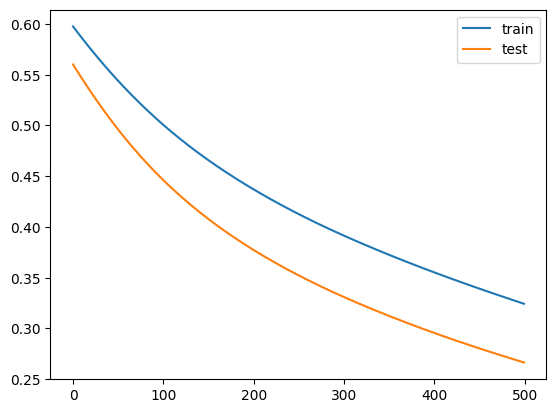

In [13]:
import matplotlib.pyplot as plt

loss_test=[]
loss_train=[]

#training loop
for op in range(num_epochs):
    model.train()
    predicted_y = model(x_train)
    losses = loss(predicted_y, y_train)

    #ask the model to minize the loss
    criteria.zero_grad()
    losses.backward()
    criteria.step()
    print(losses.item())
    loss_train.append(losses.item())
    #todo: Store the traning loop in a list
    # evaluation
    model.eval()
    with torch.no_grad():
        test_y=model(x_test)
        test_loss=loss(test_y, y_test)
        loss_test.append(test_loss.item())
        #todo: store the test losses in a list


        #todo: plot the traning and predicition loss in a graph



plt.plot(loss_train, label='train')
plt.plot(loss_test, label='test')
plt.legend()
plt.show()

In [14]:
# calculating accuracy
with torch.no_grad():
  outputs=model(x_test)
  # Get the predicted class indices using [1] instead of [0] from torch.max
  _, predicted_classes=torch.max(outputs.data, 1)

# Now predicted_classes will contain the indices
accuracy=(predicted_classes == y_test).sum().item()/y_test.size(0)
print(accuracy)

0.9666666666666667


[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]


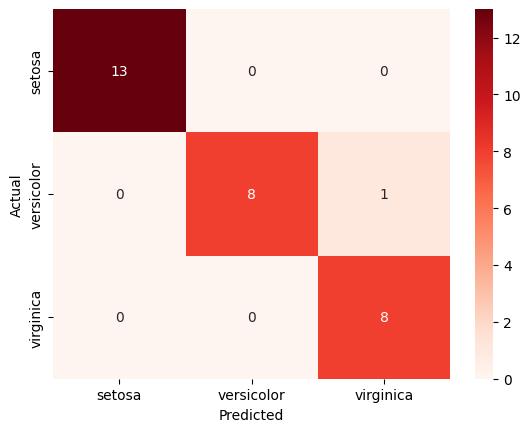

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predicted_classes)
print(cm)
sns.heatmap(cm, annot=True, cmap='Reds',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()